In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
datafile = 'D:/123/air_data.csv'
data = pd.read_csv(datafile, encoding="utf-8")
print(data.shape)
print(data.info())

(62988, 44)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   MEMBER_NO                62988 non-null  int64  
 1   FFP_DATE                 62988 non-null  object 
 2   FIRST_FLIGHT_DATE        62988 non-null  object 
 3   GENDER                   62985 non-null  object 
 4   FFP_TIER                 62988 non-null  int64  
 5   WORK_CITY                60719 non-null  object 
 6   WORK_PROVINCE            59740 non-null  object 
 7   WORK_COUNTRY             62962 non-null  object 
 8   AGE                      62568 non-null  float64
 9   LOAD_TIME                62988 non-null  object 
 10  FLIGHT_COUNT             62988 non-null  int64  
 11  BP_SUM                   62988 non-null  int64  
 12  EP_SUM_YR_1              62988 non-null  int64  
 13  EP_SUM_YR_2              62988 non-null  int64  
 14  SUM_YR_1  

In [3]:
print(data[0:5])

   MEMBER_NO    FFP_DATE FIRST_FLIGHT_DATE GENDER  FFP_TIER    WORK_CITY  \
0      54993  2006/11/02        2008/12/24      男         6            .   
1      28065  2007/02/19        2007/08/03      男         6          NaN   
2      55106  2007/02/01        2007/08/30      男         6            .   
3      21189  2008/08/22        2008/08/23      男         5  Los Angeles   
4      39546  2009/04/10        2009/04/15      男         6           贵阳   

  WORK_PROVINCE WORK_COUNTRY   AGE   LOAD_TIME  ...  ADD_Point_SUM  \
0            北京           CN  31.0  2014/03/31  ...          39992   
1            北京           CN  42.0  2014/03/31  ...          12000   
2            北京           CN  40.0  2014/03/31  ...          15491   
3            CA           US  64.0  2014/03/31  ...              0   
4            贵州           CN  48.0  2014/03/31  ...          22704   

   Eli_Add_Point_Sum  L1Y_ELi_Add_Points  Points_Sum  L1Y_Points_Sum  \
0             114452              111100      6197

In [5]:
data = data[data["SUM_YR_1"].notnull() & data["SUM_YR_2"].notnull()]
index1 = data["SUM_YR_1"] != 0
index2 = data["SUM_YR_2"] != 0
index3 = (data["SEG_KM_SUM"] == 0) & (data["avg_discount"] == 0)
data = data[index1 | index2| index3]
print(data.shape)

(62044, 44)


In [6]:
filter_data = data[[ "FFP_DATE", "LOAD_TIME", "FLIGHT_COUNT", "SUM_YR_1", "SUM_YR_2", "SEG_KM_SUM", "AVG_INTERVAL" , "MAX_INTERVAL", "avg_discount"]]
filter_data[0:5]

,FFP_DATE,LOAD_TIME,FLIGHT_COUNT,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,AVG_INTERVAL,MAX_INTERVAL,avg_discount
0,2006/11/02,2014/03/31,210,239560.0,234188.0,580717,3.483254,18,0.961639
1,2007/02/19,2014/03/31,140,171483.0,167434.0,293678,5.194245,17,1.252314
2,2007/02/01,2014/03/31,135,163618.0,164982.0,283712,5.298507,18,1.254676
3,2008/08/22,2014/03/31,23,116350.0,125500.0,281336,27.863636,73,1.090870
4,2009/04/10,2014/03/31,152,124560.0,130702.0,309928,4.788079,47,0.970658


In [7]:
data["LOAD_TIME"] = pd.to_datetime(data["LOAD_TIME"])
data["FFP_DATE"] = pd.to_datetime(data["FFP_DATE"])
data["入会时间"] = data["LOAD_TIME"] - data["FFP_DATE"]
data["平均每公里票价"] = (data["SUM_YR_1"] + data["SUM_YR_2"]) / data["SEG_KM_SUM"]
data["时间间隔差值"] = data["MAX_INTERVAL"] - data["AVG_INTERVAL"]
deal_data = data.rename(
    columns = {"FLIGHT_COUNT" : "飞行次数", "SEG_KM_SUM" : "总里程", "avg_discount" : "平均折扣率"},
    inplace = False
)
filter_data = deal_data[["入会时间", "飞行次数", "平均每公里票价", "总里程", "时间间隔差值", "平均折扣率"]]
print(filter_data[0:5])
filter_data['入会时间'] = filter_data['入会时间'].astype(np.int64)/(60*60*24*10**9)
print(filter_data[0:5])
print(filter_data.info())

       入会时间  飞行次数   平均每公里票价     总里程     时间间隔差值     平均折扣率
0 2706 days   210  0.815798  580717  14.516746  0.961639
1 2597 days   140  1.154043  293678  11.805755  1.252314
2 2615 days   135  1.158217  283712  12.701493  1.254676
3 2047 days    23  0.859648  281336  45.136364  1.090870
4 1816 days   152  0.823617  309928  42.211921  0.970658
     入会时间  飞行次数   平均每公里票价     总里程     时间间隔差值     平均折扣率
0  2706.0   210  0.815798  580717  14.516746  0.961639
1  2597.0   140  1.154043  293678  11.805755  1.252314
2  2615.0   135  1.158217  283712  12.701493  1.254676
3  2047.0    23  0.859648  281336  45.136364  1.090870
4  1816.0   152  0.823617  309928  42.211921  0.970658
<class 'pandas.core.frame.DataFrame'>
Int64Index: 62044 entries, 0 to 62978
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   入会时间     62044 non-null  float64
 1   飞行次数     62044 non-null  int64  
 2   平均每公里票价  62044 non-null  float64
 3   总里程      62044 non-null  

D:\anacondapy2\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [8]:
filter_zscore_data = (filter_data - filter_data.mean(axis=0))/(filter_data.std(axis=0))
filter_zscore_data[0:5]

,入会时间,飞行次数,平均每公里票价,总里程,时间间隔差值,平均折扣率
0,1.435707,14.034016,0.605115,26.761154,-0.987974,1.295540
1,1.307152,9.073213,1.812903,13.126864,-1.019566,2.868176
2,1.328381,8.718869,1.827807,12.653481,-1.009128,2.880950
3,0.658476,0.781585,0.761692,12.540622,-0.631155,1.994714
4,0.386032,9.923636,0.633034,13.898736,-0.665235,1.344335


In [11]:

def distEclud(vecA, vecB):
    """
    计算两个向量的欧式距离的平方，并返回
    """
    return np.sum(np.power(vecA - vecB, 2))
 
def test_Kmeans_nclusters(data_train):
    """
    计算不同的k值时，SSE的大小变化
    """
    data_train = data_train.values
    nums=range(2,10)
    SSE = []
    for num in nums:
        sse = 0
        kmodel = KMeans(n_clusters=num, n_jobs=4)
        kmodel.fit(data_train)
        # 簇中心
        cluster_ceter_list = kmodel.cluster_centers_
        # 个样本属于的簇序号列表
        cluster_list = kmodel.labels_.tolist()
        for index in  range(len(data)):
            cluster_num = cluster_list[index]
            sse += distEclud(data_train[index, :], cluster_ceter_list[cluster_num])
        print("簇数是",num , "时； SSE是", sse)
        SSE.append(sse)
    return nums, SSE
nums, SSE = test_Kmeans_nclusters(filter_zscore_data)

簇数是 2 时； SSE是 296587.92694098846
簇数是 3 时； SSE是 245319.09387027696
簇数是 4 时； SSE是 209300.25959386828
簇数是 5 时； SSE是 183886.5659715941
簇数是 6 时； SSE是 167466.04900860044
簇数是 7 时； SSE是 151869.35666267417
簇数是 8 时； SSE是 142922.90262145086
簇数是 9 时； SSE是 135014.7392550545


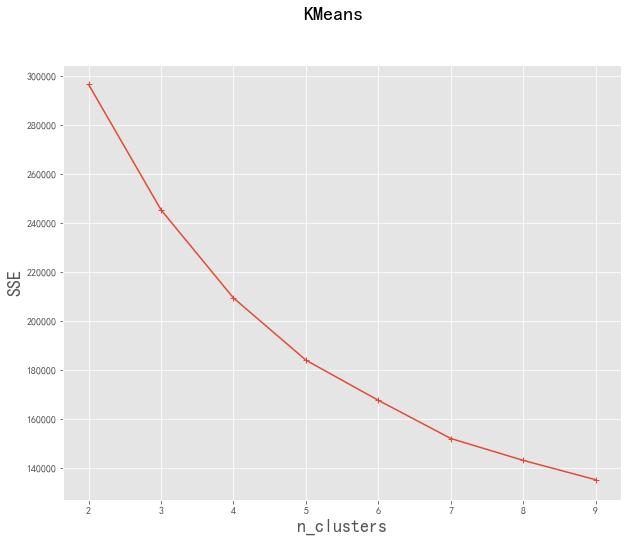

In [12]:

plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['font.size'] = 12.0
plt.rcParams['axes.unicode_minus'] = False
# 使用ggplot的绘图风格
plt.style.use('ggplot')
## 绘图观测SSE与簇个数的关系
fig=plt.figure(figsize=(10, 8))
ax=fig.add_subplot(1,1,1)
ax.plot(nums,SSE,marker="+")
ax.set_xlabel("n_clusters", fontsize=18)
ax.set_ylabel("SSE", fontsize=18)
fig.suptitle("KMeans", fontsize=20)
plt.show()

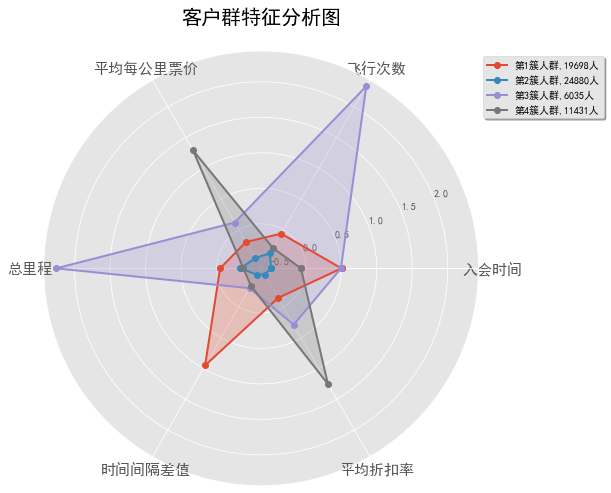

In [13]:

kmodel = KMeans(n_clusters=4, n_jobs=4)
kmodel.fit(filter_zscore_data)
# 简单打印结果
r1 = pd.Series(kmodel.labels_).value_counts() #统计各个类别的数目
r2 = pd.DataFrame(kmodel.cluster_centers_) #找出聚类中心
# 所有簇中心坐标值中最大值和最小值
max = r2.values.max()
min = r2.values.min()
r = pd.concat([r2, r1], axis = 1) #横向连接（0是纵向），得到聚类中心对应的类别下的数目
r.columns = list(filter_zscore_data.columns) + [u'类别数目'] #重命名表头
 
# 绘图
fig=plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, polar=True)
center_num = r.values
feature = ["入会时间", "飞行次数", "平均每公里票价", "总里程", "时间间隔差值", "平均折扣率"]
N =len(feature)
for i, v in enumerate(center_num):
    # 设置雷达图的角度，用于平分切开一个圆面
    angles=np.linspace(0, 2*np.pi, N, endpoint=False)
    # 为了使雷达图一圈封闭起来，需要下面的步骤
    center = np.concatenate((v[:-1],[v[0]]))
    angles=np.concatenate((angles,[angles[0]]))
    # 绘制折线图
    ax.plot(angles, center, 'o-', linewidth=2, label = "第%d簇人群,%d人"% (i+1,v[-1]))
    # 填充颜色
    ax.fill(angles, center, alpha=0.25)
    # 添加每个特征的标签
    ax.set_thetagrids(angles * 180/np.pi, feature, fontsize=15)
    # 设置雷达图的范围
    ax.set_ylim(min-0.1, max+0.1)
    # 添加标题
    plt.title('客户群特征分析图', fontsize=20)
    # 添加网格线
    ax.grid(True)
    # 设置图例
    plt.legend(loc='upper right', bbox_to_anchor=(1.3,1.0),ncol=1,fancybox=True,shadow=True)
    
# 显示图形